# GMM模型对M/F/C分别建模

In [3]:
import os
import pickle
import numpy as np
from joblib import dump, load
from scipy.io.wavfile import read
from tqdm import tqdm
from sklearn.mixture import GaussianMixture as GMM 
import python_speech_features as mfcc
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn import metrics
from matplotlib import rcParams
import json
import warnings
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 16, 8
# https://github.com/abhijeet3922/PyGender-Voice
# https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb

In [19]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [4]:
def get_MFCC(sr,audio):
    features = mfcc.mfcc(audio,sr, 0.025, 0.01, 13,appendEnergy = False)
    features = preprocessing.scale(features)
    return features

In [5]:
def save_features_as_json(sources, mode):
    print('saving {} features.'.format(mode))
    dic_features = {}
    for k, v in sources.items():
        dic_features[k] = {}
        files = [os.path.join(v,f) for f in os.listdir(v) if f.endswith('.wav')]
        for f in tqdm(files):
            try:
                sr,audio = read(f)
            except:
                print('read file failed: {}'.format(f))
            feature = get_MFCC(sr,audio)
            dic_features[k][f] = feature.tolist()
        print('{} file features were extracted from {}.'.format(len(files), v))
        
    jsObj = json.dumps(dic_features)
    filename = '{}_features.json'.format(mode)
    fileObject = open(filename, 'w')
    fileObject.write(jsObj)
    fileObject.close()
    print('features saved as {}'.format(filename))

In [6]:
def save_features_as_npy(sources, mode):
    print('saving {} features.'.format(mode))
    for k, v in sources.items():
        files = [os.path.join(v,f) for f in os.listdir(v) if f.endswith('.wav')]
        features = np.asarray(())
        for f in tqdm(files):
            try:
                sr,audio = read(f)
            except:
                print('read file failed: {}'.format(f))
            vector = get_MFCC(sr,audio)
            if features.size == 0:
                features = vector
            else:
                features = np.vstack((features, vector))
        print('{} file features were extracted from {}.'.format(len(files), v))
        np.save('{}_{}.npy'.format(k, mode), features)
        print('features saved as {}_{}.npy'.format(k, mode))

In [41]:
# saving training features
Children_source = "E:/data/speakergender/train/c/"
Female_source = "E:/data/speakergender/train/f/"
Male_source = "E:/data/speakergender/train/m/"

sources = {'Children':Children_source, 'Female':Female_source, 'Male':Male_source}
#sources = {'Male':Male_source}
save_features(sources, 'train')

saving train features.


100%|██████████| 6173/6173 [00:39<00:00, 157.25it/s]


6173 file features were extracted from E:/data/speakergender/train/c/.


100%|██████████| 10028/10028 [00:51<00:00, 194.07it/s]


10028 file features were extracted from E:/data/speakergender/train/f/.


  8%|▊         | 188/2241 [00:01<00:12, 162.38it/s]

read file failed: E:/data/speakergender/train/m/_20180101000015722654.wav


100%|██████████| 2241/2241 [00:10<00:00, 219.21it/s]


2241 file features were extracted from E:/data/speakergender/train/m/.
features saved as train_features.json


In [ ]:
sr,audio = read('E:/data/speakergender/train/m/_20180101000015722654.wav')

In [55]:
# saving training features
Children_source = "E:/data/speakergender/train/c/"
Female_source = "E:/data/speakergender/train/f/"
Male_source = "E:/data/speakergender/train/m/"

sources = {'Children':Children_source, 'Female':Female_source, 'Male':Male_source}
#sources = {'Male':Male_source}
save_features_as_npy(sources, 'train')

saving train features.


100%|██████████| 6173/6173 [04:08<00:00, 13.97it/s]


6173 file features were extracted from E:/data/speakergender/train/c/.
features saved as Children_train.npy


100%|██████████| 10028/10028 [07:40<00:00, 11.58it/s]


10028 file features were extracted from E:/data/speakergender/train/f/.
features saved as Female_train.npy


  9%|▊         | 196/2241 [00:00<00:09, 207.27it/s]

read file failed: E:/data/speakergender/train/m/_20180101000015722654.wav


100%|██████████| 2241/2241 [00:30<00:00, 74.68it/s]


2241 file features were extracted from E:/data/speakergender/train/m/.
features saved as Male_train.npy


In [42]:
# saving testing features
Children_test_source = "E:/data/speakergender/test/c/"
Female_test_source = "E:/data/speakergender/test/f/"
Male_test_source = "E:/data/speakergender/test/m/"     
test_sources = {'Children':Children_test_source, 'Female':Female_test_source, 'Male':Male_test_source}

save_features(test_sources, 'test')

saving test features.


100%|██████████| 1500/1500 [00:09<00:00, 158.67it/s]


1500 file features were extracted from E:/data/speakergender/test/c/.


100%|██████████| 1500/1500 [00:07<00:00, 198.77it/s]


1500 file features were extracted from E:/data/speakergender/test/f/.


100%|██████████| 1500/1500 [00:07<00:00, 189.69it/s]


1500 file features were extracted from E:/data/speakergender/test/m/.
features saved as test_features.json


In [56]:
# saving testing features
Children_test_source = "E:/data/speakergender/test/c/"
Female_test_source = "E:/data/speakergender/test/f/"
Male_test_source = "E:/data/speakergender/test/m/"     
test_sources = {'Children':Children_test_source, 'Female':Female_test_source, 'Male':Male_test_source}

save_features_as_npy(test_sources, 'test')

saving test features.


100%|██████████| 1500/1500 [00:21<00:00, 70.10it/s]


1500 file features were extracted from E:/data/speakergender/test/c/.
features saved as Children_test.npy


100%|██████████| 1500/1500 [00:18<00:00, 81.73it/s]


1500 file features were extracted from E:/data/speakergender/test/f/.
features saved as Female_test.npy


100%|██████████| 1500/1500 [00:18<00:00, 49.74it/s]


1500 file features were extracted from E:/data/speakergender/test/m/.
features saved as Male_test.npy


In [7]:
def load_from_npy(pth_features):
    features = {}
    for pth in pth_features:
        k = pth.split('_')[0]
        v = np.load(pth)
        features[k] = v
    return features

In [8]:
def load_from_json(pth_features):
    
    with open(pth_features, encoding='utf-8') as f:
        line = f.read()
        features = json.loads(line)
        
    return features

In [9]:
# training
def train(features, components, iters):
    
    for k, v in features.items():
        print('training {} model with {} components:'.format(k, components))
        gmm = GMM(n_components = components, max_iter = iters, n_init = 3)
        gmm.fit(v)
        print('model saving as {}_{}.joblib'.format(k, components))
        dump(gmm, 'models/{}_{}.joblib'.format(k, components))
        
    return gmm

In [11]:
# train
pth_features = ['Children_train.npy', 'Female_train.npy','Male_train.npy']
train_features = load_from_npy(pth_features)

train(train_features, 8, 100)

training Children model:
model saving as Children_8.joblib
training Female model:
model saving as Female_8.joblib
training Male model:
model saving as Male_8.joblib


In [10]:
#train different components
n_clusters = 20
pth_features = ['Children_train.npy', 'Female_train.npy','Male_train.npy']
train_features = load_from_npy(pth_features)

for i in range(2,n_clusters+1):
    train(train_features, i, 150)

training Children model with 2 components:
model saving as Children_2.joblib
training Female model with 2 components:
model saving as Female_2.joblib
training Male model with 2 components:
model saving as Male_2.joblib
training Children model with 3 components:
model saving as Children_3.joblib
training Female model with 3 components:
model saving as Female_3.joblib
training Male model with 3 components:
model saving as Male_3.joblib
training Children model with 4 components:
model saving as Children_4.joblib
training Female model with 4 components:
model saving as Female_4.joblib
training Male model with 4 components:
model saving as Male_4.joblib
training Children model with 5 components:
model saving as Children_5.joblib
training Female model with 5 components:
model saving as Female_5.joblib
training Male model with 5 components:
model saving as Male_5.joblib
training Children model with 6 components:
model saving as Children_6.joblib
training Female model with 6 components:
model 

In [37]:
def test(features, models):
    
    genders = list(features.keys())
    result = {}
    for k,v in features.items():
        tmp = {}
        for kk, vv in v.items():
            scores = None
            log_likelihood = np.zeros(len(models))
            for i in range(len(models)):
                gmm = models[i]
                scores = np.array(gmm.score(vv))
                log_likelihood[i] = scores.sum()
            winner = np.argmax(log_likelihood)
            tmp[kk] = genders[winner]
        result[k] = tmp
        
        count = {}
        for gender in tmp.values():
            if gender not in count:
                count[gender] = 1
            else:
                count[gender] += 1

        print("Total {} files were checked in {}.".format(len(v), k))
        print("Found {} children, {} females and {} males.".format(count['Children'], count['Female'], count['Male']))
    
    return result

In [13]:
childrenM = load('Children_8.joblib')
femaleM = load('Female_8.joblib')
maleM = load('Male_8.joblib')

models = [childrenM, femaleM, maleM]
features = load_from_json('test_features.json')
res = test(features, models)

Total 1500 files were checked in Children.
Found 1119 children, 144 males and 237 females.
Total 1500 files were checked in Female.
Found 223 children, 253 males and 1024 females.
Total 1500 files were checked in Male.
Found 14 children, 1429 males and 57 females.


### choose components

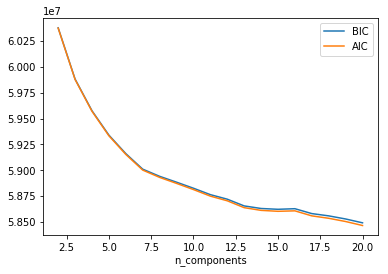

In [16]:
Model_type = 'Children'
features = np.load('{}_train.npy'.format(Model_type))
n_components = np.arange(2, 21)

models = [load('models/{}_{}.joblib'.format(Model_type, n)) for n in n_components]

plt.plot(n_components, [m.bic(features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

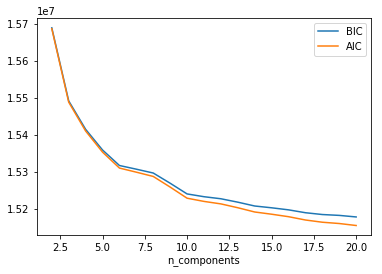

In [13]:
Model_type = 'Male'
features = np.load('{}_train.npy'.format(Model_type))
n_components = np.arange(2, 21)

models = [load('models/{}_{}.joblib'.format(Model_type, n)) for n in n_components]

plt.plot(n_components, [m.bic(features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

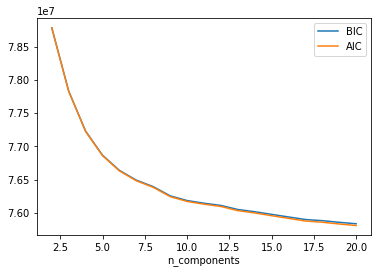

In [14]:
Model_type = 'Female'
features = np.load('{}_train.npy'.format(Model_type))
n_components = np.arange(2, 21)

models = [load('models/{}_{}.joblib'.format(Model_type, n)) for n in n_components]

plt.plot(n_components, [m.bic(features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [26]:
embeddings=np.load('Children_train.npy')
n_clusters=np.arange(2, 21)
bics=[]
bics_err=[]
iterations=1   
for n in tqdm(n_clusters):
    tmp_bic=[]
    for _ in range(iterations):
        gmm=load('models/Children_{}.joblib'.format(n))
        
        tmp_bic.append(gmm.bic(embeddings))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

100%|██████████| 19/19 [01:21<00:00,  6.86s/it]


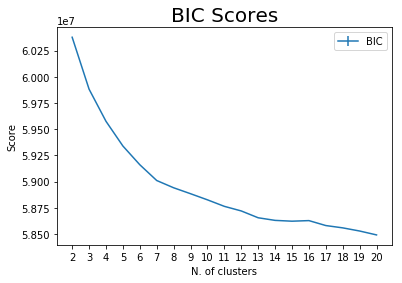

In [27]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

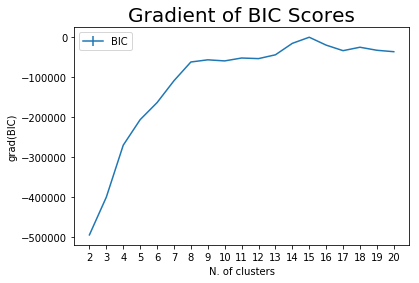

In [28]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [29]:
embeddings=np.load('Male_train.npy')
n_clusters=np.arange(2, 21)
bics=[]
bics_err=[]
iterations=1   
for n in tqdm(n_clusters):
    tmp_bic=[]
    for _ in range(iterations):
        gmm=load('models/Male_{}.joblib'.format(n))
        
        tmp_bic.append(gmm.bic(embeddings))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

100%|██████████| 19/19 [00:23<00:00,  1.93s/it]


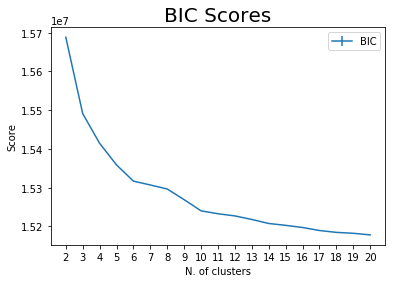

In [30]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

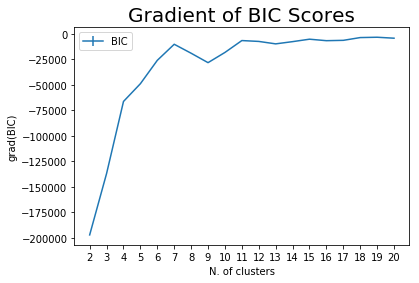

In [31]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [32]:
embeddings=np.load('Female_train.npy')
n_clusters=np.arange(2, 21)
bics=[]
bics_err=[]
iterations=1   
for n in tqdm(n_clusters):
    tmp_bic=[]
    for _ in range(iterations):
        gmm=load('models/Female_{}.joblib'.format(n))
        
        tmp_bic.append(gmm.bic(embeddings))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

100%|██████████| 19/19 [01:47<00:00,  8.90s/it]


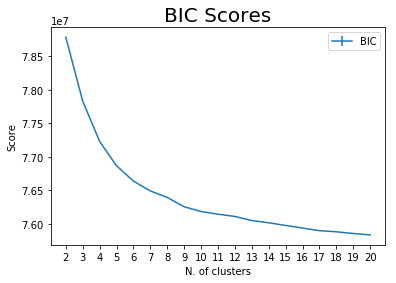

In [33]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

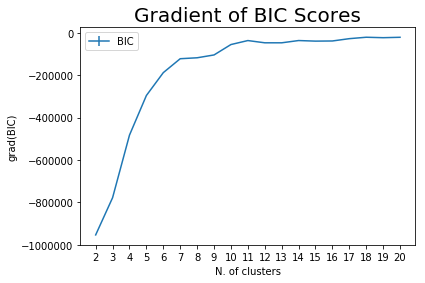

In [34]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [38]:
# set components: 7 and test
components = 7
childrenM = load('models/Children_{}.joblib'.format(components))
femaleM = load('models/Female_{}.joblib'.format(components))
maleM = load('models/Male_{}.joblib'.format(components))

models = [childrenM, femaleM, maleM]
features = load_from_json('test_features.json')
res = test(features, models)

Total 1500 files were checked in Children.
Found 1114 children, 262 females and 124 males.
Total 1500 files were checked in Female.
Found 209 children, 1056 females and 235 males.
Total 1500 files were checked in Male.
Found 20 children, 53 females and 1427 males.


In [52]:
def get_l(res):
    
    y_true = []
    y_pred = []
    for k,v in res.items():
        for kk, vv in v.items():
            if kk.find('/c/') > 0:
                y_true.append('Children')
            elif kk.find('/f/') > 0:
                y_true.append('Female')
            else:
                y_true.append('Male')
            y_pred.append(vv)
    
    return y_true, y_pred

In [49]:
y_true, y_pred = get_l(res)

In [50]:
len(y_true),len(y_pred)

(4500, 4500)

In [134]:
def plot_cm(n, y_true, y_pred):
    labels = ["Children", "Female", "Male"]
    mat = confusion_matrix(y_true, y_pred, labels=labels)
    accuracy = accuracy_score(y_true, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    plt.title('{} components with acc: {}'.format(n, accuracy))
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

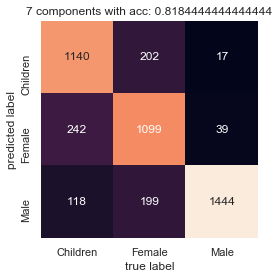

In [135]:
plot_cm(7, y_true, y_pred)

In [70]:
components = 20
result = {}
for i in range(2, components+1):
    
    childrenM = load('models/Children_{}.joblib'.format(i))
    femaleM = load('models/Female_{}.joblib'.format(i))
    maleM = load('models/Male_{}.joblib'.format(i))

    models = [childrenM, femaleM, maleM]
    features = load_from_json('test_features.json')
    res = test(features, models);
    y_true, y_pred = get_l(res)
    result[i] = (y_true, y_pred)

Total 1500 files were checked in Children.
Found 1089 children, 234 females and 177 males.
Total 1500 files were checked in Female.
Found 285 children, 870 females and 345 males.
Total 1500 files were checked in Male.
Found 62 children, 90 females and 1348 males.
Total 1500 files were checked in Children.
Found 1065 children, 232 females and 203 males.
Total 1500 files were checked in Female.
Found 196 children, 903 females and 401 males.
Total 1500 files were checked in Male.
Found 25 children, 56 females and 1419 males.
Total 1500 files were checked in Children.
Found 1088 children, 246 females and 166 males.
Total 1500 files were checked in Female.
Found 221 children, 977 females and 302 males.
Total 1500 files were checked in Male.
Found 18 children, 46 females and 1436 males.
Total 1500 files were checked in Children.
Found 1098 children, 266 females and 136 males.
Total 1500 files were checked in Female.
Found 217 children, 1027 females and 256 males.
Total 1500 files were checke

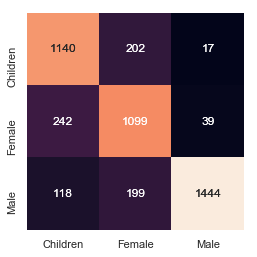

In [82]:
labels = ["Children", "Female", "Male"]
mat = confusion_matrix(y_true, y_pred, labels=labels)
accuracy = accuracy_score(y_true, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=labels,
            yticklabels=labels)

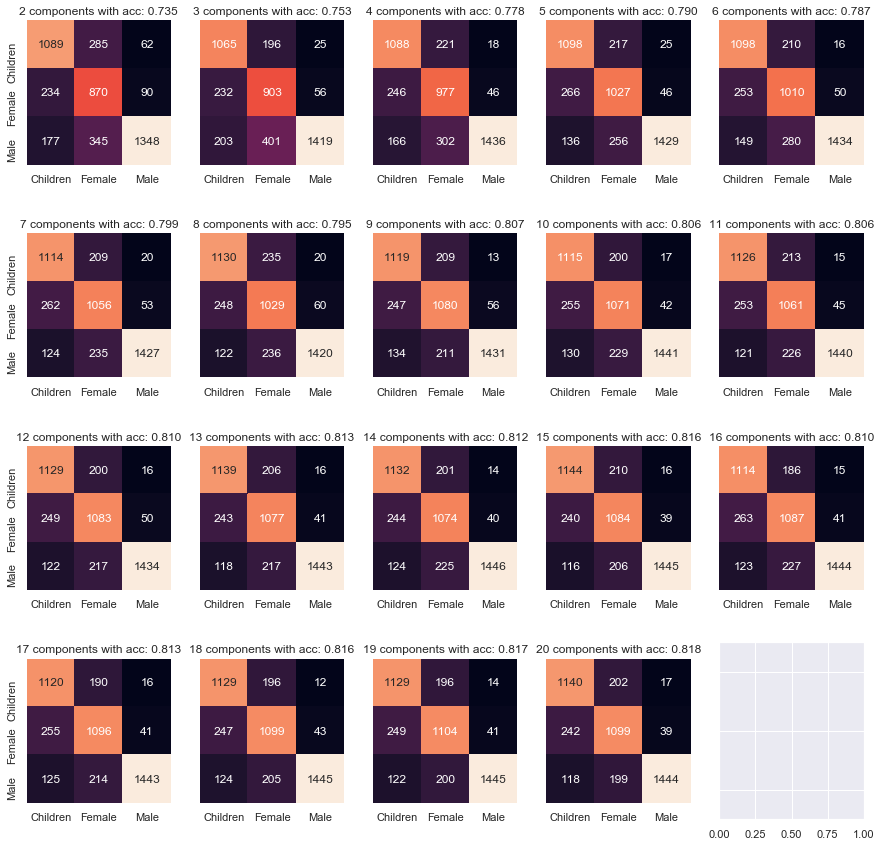

In [169]:
f,ax = plt.subplots(4,5,sharey=True,figsize=(15,15))
n = len(result)
count = 0
for i in range(4):
    if count == n:
        break
    for j in range(5):
        y_true, y_pred = result[count+2]
        mat = confusion_matrix(y_true, y_pred, labels=labels)
        accuracy = accuracy_score(y_true, y_pred)
        sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels,ax=ax[i][j])
        ax[i][j].set_title('{} components with acc: {}'.format(count+2, "%.3f" % accuracy))
        count += 1
        if count == n:
            break